In [1]:
#Setup & ensure python 3.7+ and scikit-learn are installed
import sys
import sklearn
assert sys.version_info >= (3, 7)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

# x contains the image pixel values (features), y contains the corresponding digit labels (0-9)
X, y = mnist.data, mnist.target

In [3]:
#Pick the digit 3 and create binary labels
from sklearn.linear_model import SGDClassifier

#convert target labels to true for "3" and false for other digits
y_train_3 = (y[:60000] == '3')  #training set labels
y_test_3 = (y[60000:] == '3')  #test set labels

#train a SGD classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X[:60000], y_train_3)

#predict whether the first image is a 3
sgd_clf.predict([X[0]])

array([False])

In [4]:
#perform cross-validation
#Compute model accuracy
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X[:60000], y_train_3, cv=3, scoring="accuracy")

array([0.9496 , 0.9624 , 0.96275])

In [5]:
#generate a confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X[:60000], y_train_3, cv=3)
confusion_matrix(y_train_3, y_train_pred)

array([[53477,   392],
       [ 2113,  4018]], dtype=int64)

In [6]:
#calculate precision and recall
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_train_3, y_train_pred)
recall = recall_score(y_train_3, y_train_pred)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")

Precision: 0.91, Recall: 0.66


In [7]:
#Compute F1 score
from sklearn.metrics import f1_score
f1_score(y_train_3, y_train_pred)

0.7623565126648326

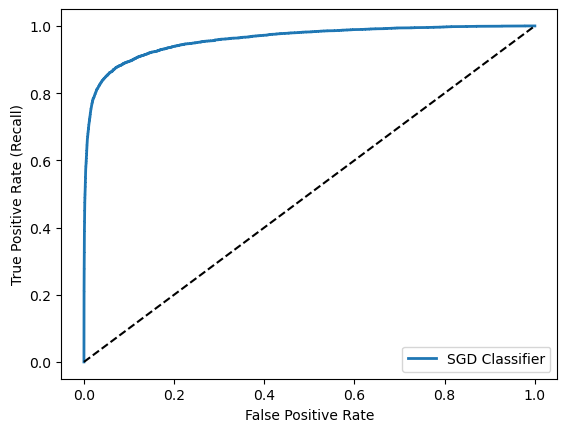

In [8]:
#Plot a ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

#compute roc curve values
y_scores = cross_val_predict(sgd_clf, X[:60000], y_train_3, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

#plot the roc curve
plt.plot(fpr, tpr, linewidth=2, label="SGD Classifier")
plt.plot([0,1], [0,1], 'k--')  #Random Classifier Line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X[:60000], y[:60000])
forest_clf.predict([X[0]])

array(['5'], dtype=object)

In [10]:
forest_clf.predict([X[1]])

array(['0'], dtype=object)

In [11]:
print(y[1])

0


In [12]:
from sklearn.model_selection import cross_val_score

accuracy_scores = cross_val_score(forest_clf, X[:60000], y[:60000], cv=3, scoring="accuracy")

print("Cross-Validation Accuracy scores:", accuracy_scores)
print("mean accuracy:", accuracy_scores.mean())

Cross-Validation Accuracy scores: [0.9646  0.96255 0.9666 ]
mean accuracy: 0.9645833333333335


In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(forest_clf, X[:60000], y[:60000], cv=3)
conf_matrix = confusion_matrix(y[:60000], y_train_pred)

print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[5840    1    8    2    4    9   20    1   35    3]
 [   1 6635   43   11   13    5    6   13   12    3]
 [  27   12 5749   30   32    4   20   37   41    6]
 [   7    7   91 5811    3   63    7   49   61   32]
 [  12   13   14    1 5645    0   28   14   17   98]
 [  20    9    9   64   12 5198   53    6   31   19]
 [  26   11    5    0   12   46 5803    0   15    0]
 [   4   24   58    6   37    1    0 6037   11   87]
 [   9   35   44   52   26   52   27    5 5525   76]
 [  21   10   14   76   75   15    3   58   45 5632]]
